### Assignment - 6

**Name: Anupam Kumar**

**ID No: 11940160**

## Assignment Problem:

State-Space Definition of the System:

$\dot{x_1}(t) = x_2(t)$

$\dot{x_2}(t) = -2x_1(t) + 2x_2(t) + 2u(t)$

Boundary Conditions:

$x_2(0) = -2$
$x_1(0) = 1$

The Performance Index:

$PI = \dfrac{1}{2} \left[ x_{1}^2(6) + 2x_1(6)x_2(6) + 2x_2^2(6) \right] + \int_0^6 \left[ 2x_{1}^2(t) + 3x_1(t)x_2(t) + 2x_2^2(t) + \dfrac{u(t)^2}{2} \right]dt$

Find optimal control input $u(t)$ for the given system in order to minimize the performance index.

**Assignment Solution**:

$B = \begin{bmatrix} 0 \\ 2 \end{bmatrix}$

$A = \begin{bmatrix} 0 & 1 \\ -2 & 2 \end{bmatrix}$

$t_f = 6$

$R = 1$

$F = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}$

$Q = \begin{bmatrix} 4 & 3 \\ 3 & 4 \end{bmatrix}$

### Eigen-Vales of $A$:

$\lambda_1 = 1 + j$

$\lambda_2 = 1 - j$

Since the Real-Part in both Eigen-Values is +ve, this system is unstable.

Now, Using the Matrix Differential Riccati Equation:

$\dot{P} = -(A^TP + PA - PBR^{-1}B^TP + Q)$

$\begin{bmatrix} \dot{P_{11}(t)} & \dot{P_{12}(t)} \\ \dot{P_{12}(t)} & \dot{P_{22}(t)} \end{bmatrix} = -\begin{bmatrix} 0 & -2 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} P_{11}(t) & P_{12}(t) \\ P_{12}(t) & P_{22}(t) \end{bmatrix} - \begin{bmatrix} P_{11}(t) & P_{12}(t) \\ P_{12}(t) & P_{22}(t) \end{bmatrix} \begin{bmatrix} 0 & 1 \\ -2 & 2 \end{bmatrix} + \begin{bmatrix} P_{11}(t) & P_{12}(t) \\ P_{12}(t) & P_{22}(t) \end{bmatrix} \begin{bmatrix} 0 \\ 2 \end{bmatrix} \begin{bmatrix} 0 & 2 \end{bmatrix} \begin{bmatrix} P_{11}(t) & P_{12}(t) \\ P_{12}(t) & P_{22}(t) \end{bmatrix} - \begin{bmatrix} 4 & 3 \\ 3 & 4 \end{bmatrix}$

Now, we will be using SymPy to simplify the above equation:


In [1]:
import sympy as sp

t = sp.symbols('t')
P11, P12, P22 = sp.symbols('P11 P12 P22')
P = sp.Matrix([[P11, P12], [P12, P22]])
A = sp.Matrix([[0, 1], [-2, 2]])
B = sp.Matrix([[0], [2]])
Q = sp.Matrix([[4, 3], [3, 4]])
R = 1

P_dot = -A.T*P - P*A + P*B*1*B.T*P - Q

In [2]:
P_dot

Matrix([
[                4*P12**2 + 4*P12 - 4, -P11 + 4*P12*P22 - 2*P12 + 2*P22 - 3],
[-P11 + 4*P12*P22 - 2*P12 + 2*P22 - 3,        -2*P12 + 4*P22**2 - 4*P22 - 4]])

$Therefore,$

$\begin{bmatrix} \dot{P_{11}(t)} & \dot{P_{12}(t)} \\ \dot{P_{12}(t)} & \dot{P_{22}(t)} \end{bmatrix} = \begin{bmatrix} 4P_{12}^2 + 4P_{12} - 4 & -P_{11} + 4P_{12}P_{22} - 2P_{12} + 2P_{22} - 3 \\ -P_{11} + 4P_{12}P_{22} - 2P_{12} + 2P_{22} - 3 & -2P_{12}^2 + 4P_{22}^2 - 4P_{22} - 4 \end{bmatrix}$

From above, we get the following Equations:

$\dot{P_{11}} = 4P_{12}^2 + 4P_{12} - 4$

$\dot{P_{12}} = -P_{11} + 4P_{12}P_{22} - 2P_{12} + 2P_{22} - 3$

$\dot{P_{22}} = -2P_{12}^2 + 4P_{22}^2 - 4P_{22} - 4$

$P_{11}(6) = 1$

$P_{12}(6) = 1$

$P_{22}(6) = 2$

Now, Let's solve the above equations using **Euler's Method** and **Runge-Kutta Method** with a small time-step.

### **Runge-Kutta Method**:

$\dot{P_{11}(t)} = 4P_{12}^2(t) + 4P_{12}(t) - 4$

$\dot{P_{12}(t)} = -P_{11}(t) + 4P_{12}(t)P_{22}(t) - 2P_{12}(t) + 2P_{22}(t) - 3$

$\dot{P_{22}(t)} = -2P_{12}^2(t) + 4P_{22}^2(t) - 4P_{22}(t) - 4$

$P_{11}(6) = 1$

$P_{12}(6) = 1$

$P_{22}(6) = 2$

Solving the equations using Runge-Kutta Method:

Let's keep the time-step be $\Delta t = 0.001$

Starting with,

$\vec{X} = \begin{bmatrix} x_1(t) \\ x_2(t) \\ x_3(t) \end{bmatrix} = \begin{bmatrix} P_{11}(t) \\ P_{12}(t) \\ P_{22}(t) \end{bmatrix}$

We have:

$\dot{\vec{X}} = \begin{bmatrix} \dot{P_{11}} \\ \dot{P_{12}} \\ \dot{P_{22}} \end{bmatrix} = \begin{bmatrix} 4P_{12}^2 + 4P_{12} - 4 \\ -P_{11} + 4P_{12}P_{22} - 2P_{12} + 2P_{22} - 3 \\ -2P_{12}^2 + 4P_{22}^2 - 4P_{22} - 4 \end{bmatrix} = \begin{bmatrix} 4x_2^2 + 4x_2 - 4 \\ -x_1 + 4x_2x_3 - 2x_2 + 2x_3 - 3 \\ -2x_2^2 + 4x_3^2 - 4x_3 - 4 \end{bmatrix}$

Hence,

$\dot{\vec{X}} = \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \\ \dot{x_3} \end{bmatrix} = \begin{bmatrix} 4x_2^2 + 4x_2 - 4 \\ -x_1 + 4x_2x_3 - 2x_2 + 2x_3 - 3 \\ -2x_2^2 + 4x_3^2 - 4x_3 - 4 \end{bmatrix}$

$\vec{X}_{t=6} = \begin{bmatrix} x_1(6) \\ x_2(6) \\ x_3(6) \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}$

**Runge-Kutta Method Implementation:**

In [3]:
# Runge-Kutta 4th order
import numpy as np

def rk4(f, x0, t0, tf, h):
    t = np.arange(t0, tf, h)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(len(t)-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h*k1/2, t[i] + h/2)
        k3 = f(x[i] + h*k2/2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i] + h)
        x[i+1] = x[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return x

def f(x, t):
    return np.array([4*x[1]**2 + 4*x[1] - 4, -x[0] + 4*x[1]*x[2] - 2*x[1] + 2*x[2] - 3, -2*x[1]**2 + 4*x[2]**2 - 4*x[2] - 4])

x0 = np.array([1, 1, 2])

x = rk4(f, x0, 0, 6, 0.001)

In [17]:
def ranga_kutta(f, x0, t0, tf, h):
    t = np.arange(t0, tf, h)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(len(t)-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h*k1/2, t[i] + h/2)
        k3 = f(x[i] + h*k2/2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i] + h)
        x[i+1] = x[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return x

In [18]:
def kutta_ranga_2(f, x0, t0, tf, h):
    t = np.arange(t0, tf, h)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(len(t)-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h*k1/2, t[i] + h/2)
        k3 = f(x[i] + h*k2/2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i] + h)
        x[i+1] = x[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return x

In [4]:
x.shape

(6000, 3)

We can see that we have values for $\vec{X}$ from $t = 0$ to $t = 6$ with a time-step of $\Delta t = 0.001$.

Now, let's plot $P_{11}(t)$, $P_{12}(t)$ and $P_{22}(t)$ vs $t$

($P_{11}(t)$, $P_{12}(t)$ and $P_{22}(t)$ are the values of $\vec{X}$ at each time-step)

**Plotting**:

In [5]:
import matplotlib.pyplot as plt
t = np.arange(0, 6, 0.001)
t.shape

(6000,)

$P_{11}(t)$ vs $t$

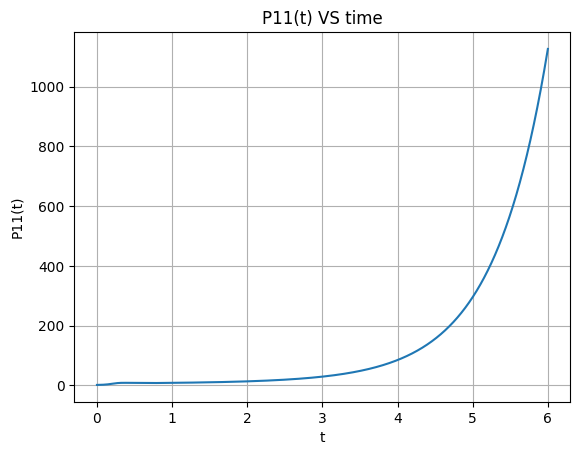

In [6]:
plt.plot(t, x[:,0])
plt.title('P11(t) VS time')
plt.xlabel('t')
plt.ylabel('P11(t)')

# Grid
plt.grid()

# Plot size
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

$P_{12}(t)$ vs $t$

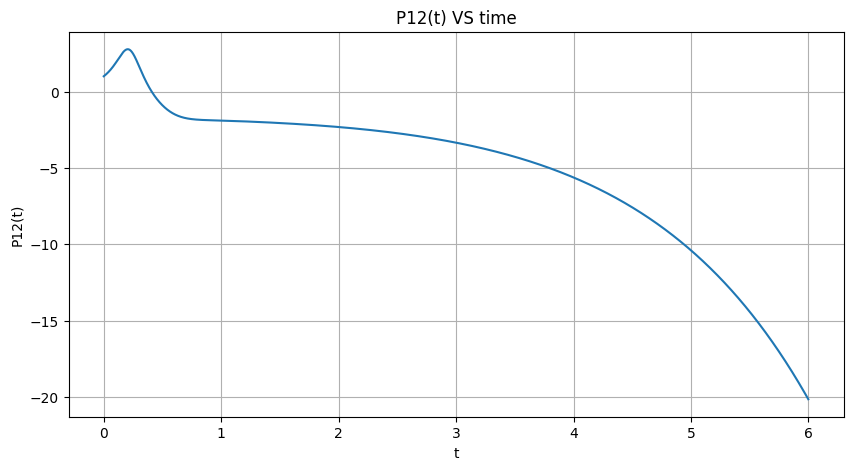

In [7]:
plt.plot(t, x[:,1])
plt.title('P12(t) VS time')
plt.xlabel('t')
plt.ylabel('P12(t)')

# Grid
plt.grid()

# Plot size
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

$P_{22}(t)$ vs $t$

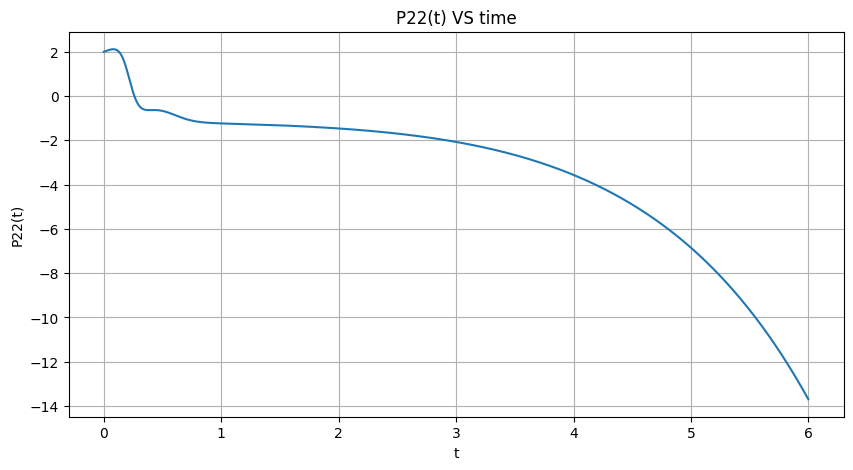

In [8]:
plt.plot(t, x[:,2])
plt.title('P22(t) VS time')
plt.xlabel('t')
plt.ylabel('P22(t)')

# Grid
plt.grid()

# Plot size
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

Plotting them together:

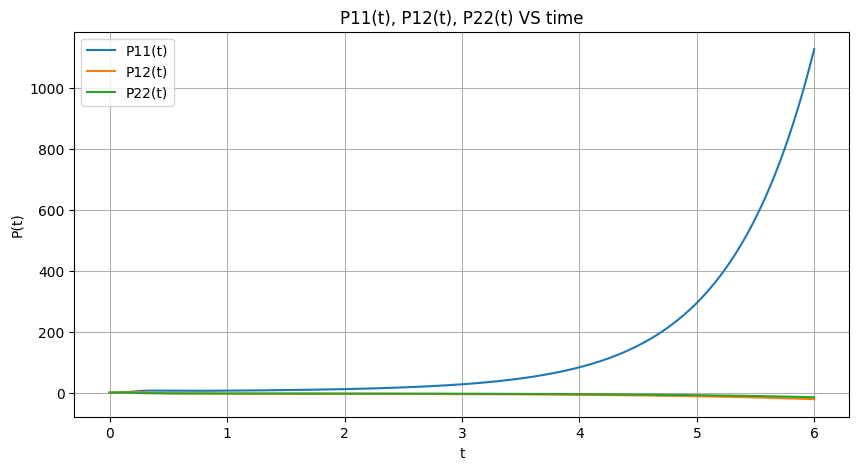

In [9]:
plt.plot(t, x[:,0], label='P11(t)')
plt.plot(t, x[:,1], label='P12(t)')
plt.plot(t, x[:,2], label='P22(t)')

plt.title('P11(t), P12(t), P22(t) VS time')

plt.xlabel('t')
plt.ylabel('P(t)')
plt.legend()

# Grid
plt.grid()

# Plot size
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

### **Euler's Method**:

$\dot{P_{11}(t)} = 4P_{12}^2(t) + 4P_{12}(t) - 4$

$\dot{P_{12}(t)} = -P_{11}(t) + 4P_{12}(t)P_{22}(t) - 2P_{12}(t) + 2P_{22}(t) - 3$

$\dot{P_{22}(t)} = -2P_{12}^2(t) + 4P_{22}^2(t) - 4P_{22}(t) - 4$

$P_{11}(6) = 1$

$P_{12}(6) = 1$

$P_{22}(6) = 2$

Solving the above equations using Euler's Method:

Let the time-step be $\Delta t = 0.001$

We have: (From above)

$\dot{\vec{X}} = \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \\ \dot{x_3} \end{bmatrix} = \begin{bmatrix} 4x_2^2 + 4x_2 - 4 \\ -x_1 + 4x_2x_3 - 2x_2 + 2x_3 - 3 \\ -2x_2^2 + 4x_3^2 - 4x_3 - 4 \end{bmatrix}$

$\vec{X}_{t=6} = \begin{bmatrix} x_1(6) \\ x_2(6) \\ x_3(6) \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}$

**Euler's Method Implementation:**

In [10]:
# Solve using Euler's method
def euler(f, x0, t0, tf, h):
    t = np.arange(t0, tf, h)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(len(t)-1):
        x[i+1] = x[i] + h*f(x[i], t[i])
    return x

def f(x, t):
    return np.array([4*x[1]**2 + 4*x[1] - 4, -x[0] + 4*x[1]*x[2] - 2*x[1] + 2*x[2] - 3, -2*x[1]**2 + 4*x[2]**2 - 4*x[2] - 4])


x0 = np.array([1, 1, 2])

x = euler(f, x0, 0, 6, 0.001)

In [11]:
x.shape

(6000, 3)

Clearly, we have values for $\vec{X}$ from $t = 0$ to $t = 6$ at a time-step of $\Delta t = 0.001$.

Now, let's plot $P_{11}(t)$, $P_{12}(t)$ and $P_{22}(t)$ vs $t$

($P_{11}(t)$, $P_{12}(t)$ and $P_{22}(t)$ are the values of $\vec{X}$ at each time-step)

**Plotting**:

In [12]:
import matplotlib.pyplot as plt
t = np.arange(0, 6, 0.001)
t.shape

(6000,)

$P_{11}(t)$ vs $t$

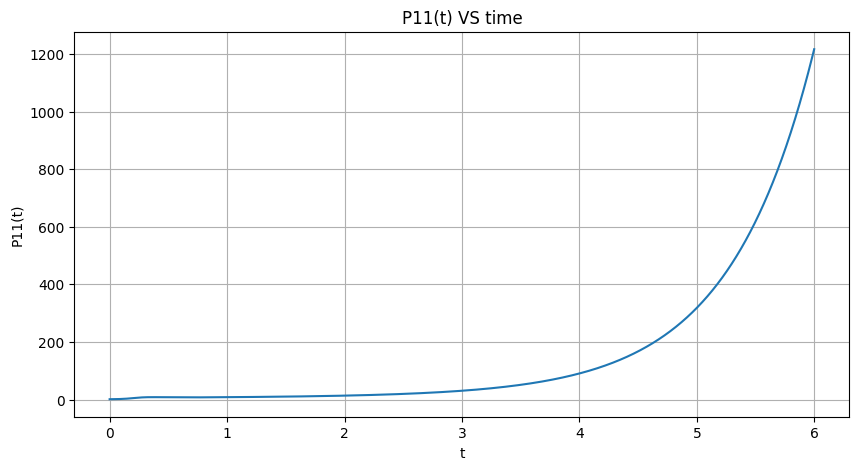

In [13]:
plt.plot(t, x[:,0])
plt.title('P11(t) VS time')
plt.xlabel('t')
plt.ylabel('P11(t)')

# Grid
plt.grid()

# Plot size
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

$P_{12}(t)$ vs $t$

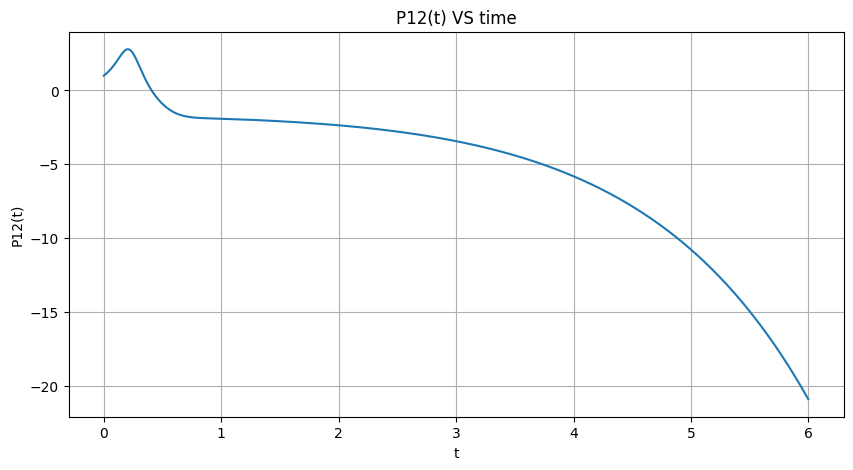

In [14]:
plt.plot(t, x[:,1])
plt.title('P12(t) VS time')
plt.xlabel('t')
plt.ylabel('P12(t)')

# Grid
plt.grid()

# Plot size
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

$P_{22}(t)$ vs $t$

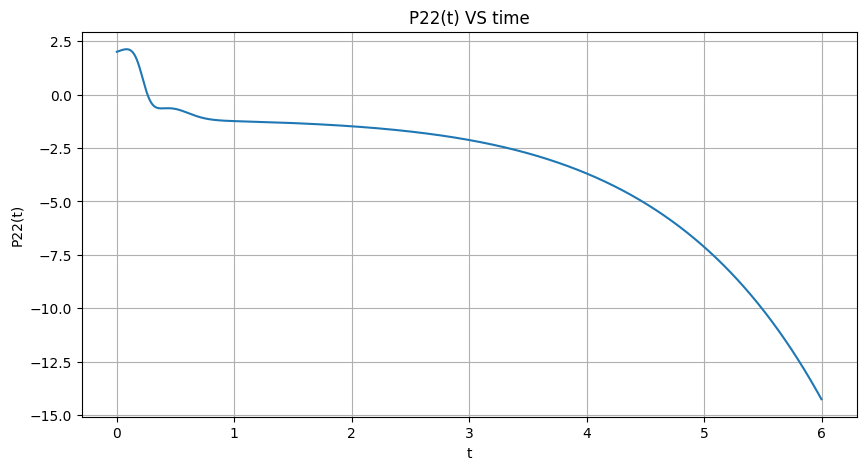

In [15]:
plt.plot(t, x[:,2])
plt.title('P22(t) VS time')
plt.xlabel('t')
plt.ylabel('P22(t)')

# Grid
plt.grid()

# Plot size
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

Plotting them together:

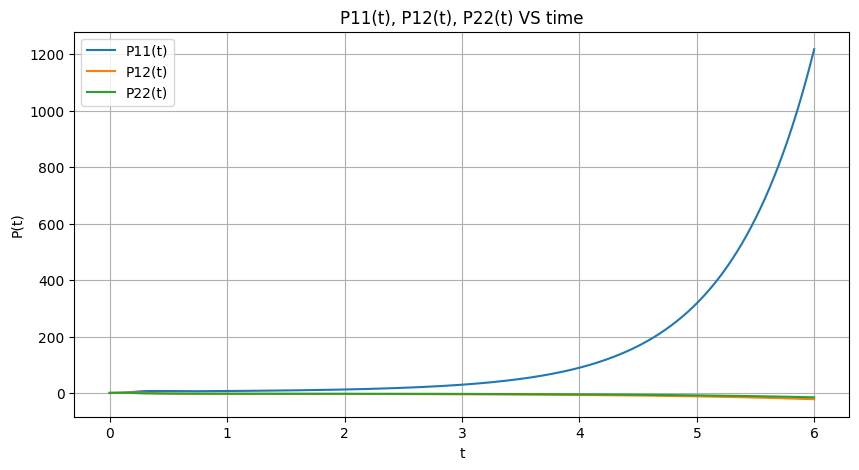

In [16]:
plt.plot(t, x[:,0], label='P11(t)')
plt.plot(t, x[:,1], label='P12(t)')
plt.plot(t, x[:,2], label='P22(t)')

plt.title('P11(t), P12(t), P22(t) VS time')

plt.xlabel('t')
plt.ylabel('P(t)')
plt.legend()

# Grid
plt.grid()

# Plot size
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

The results obtained from the Runge-Kutta Method and Euler's Method are similar but not exactly the same. (The difference is very small to be considered.)

As we can see in the above graph, it does not show an expected pattern. If we run the same code multiple times, we get different results each time. Hence, we cannot discuss whether their running times grow at the expected rates, given their theoretical asymptotic complexity, or grow faster/slower.

**Reason:**

Let the total time of execution of the code be $T$.

In reality, $T = t_p + t_r$ where $t_p$ is the time taken for the processor to execute the code that is directly proportional to the complexity of the algorithm and $t_r$ is the extra time taken by the processor to execute the code due to the random factors like the system on which the code is being run, the number of processes running in the background, etc.

Now, we know theoretically that the time taken for all algorithms. This means that we know the value of $t_p$.

We do not know the value of $t_r$ as it is dependent on the system on which the code is being run and is random.

Now, since we are running the code for a maximum input size of $10^4$, we can say that $t_p$ will be very small. Hence, also the small variations in the timing measurements can lead to different results each time you run the experiment.

Hence in our case, $t_r$ will be significant enough to be affect the results.

If we run our algorithms for larger input sizes, we will get a more pattern in the graph.